In [1]:
from types import SimpleNamespace
from src.experiment import ExperimentHandler 

system_cfg = {'punct':True, 'action':True, 'context':'back_history', 'context_len':5}
train_cfg = {'lr':1e-5, 'scheduling':False, 'epochs':1, 'print_len':200, 'bsz':8}

system_cfg = SimpleNamespace(**system_cfg)
train_cfg = SimpleNamespace(**train_cfg)

E = ExperimentHandler(system_cfg)
E.train(train_cfg)

100%|██████████| 1003/1003 [00:13<00:00, 76.09it/s]


200    1.968    0.486
400    1.278    0.633
600    1.156    0.661
800    1.047    0.701
1000   1.017    0.712
1200   0.941    0.724
1400   0.876    0.751
1600   0.883    0.733
1800   0.832    0.754
2000   0.805    0.762
2200   0.864    0.733
2400   0.798    0.759
2600   0.830    0.751
2800   0.829    0.748
3000   0.848    0.739
3200   0.746    0.772
3400   0.799    0.751
3600   0.770    0.767
3800   0.778    0.750
4000   0.807    0.744
4200   0.731    0.774
4400   0.759    0.761
4600   0.732    0.769
4800   0.762    0.751
5000   0.763    0.769
5200   0.709    0.781
5400   0.738    0.759
5600   0.669    0.791
5800   0.767    0.778
6000   0.718    0.767
6200   0.749    0.754
6400   0.719    0.769
6600   0.630    0.804
6800   0.755    0.767
7000   0.717    0.777
7200   0.755    0.762
7400   0.701    0.771
7600   0.714    0.772
7800   0.672    0.777
8000   0.656    0.797
8200   0.676    0.782
8400   0.698    0.791
8600   0.677    0.782
8800   0.693    0.776
9000   0.696    0.780
9200   0.6

/home/alta/Conversational/OET/al826/2021/dialogue_acts/framework/src/experiment.py:80: RuntimeWarning: invalid value encountered in true_divide
  precision = true_positives/pred_count


acc: 0.795  macro F1 0.592  micro F1 0.788
acc: 0.787  macro F1 0.637  micro F1 0.780


/home/alta/Conversational/OET/al826/2021/dialogue_acts/framework/src/experiment.py:81: RuntimeWarning: invalid value encountered in true_divide
  recall = true_positives/label_count
/home/alta/Conversational/OET/al826/2021/dialogue_acts/framework/src/experiment.py:86: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2*(precision*recall)/(precision+recall)


In [6]:
import numpy as np
import torch
import time

dataset = E.D.dev

confusion_matrix = np.zeros([len(E.D.act_id_dict), len(E.D.act_id_dict)])
for k, batch in enumerate(E.B.batches(dataset), start=1):
    y = E.model(batch.ids, batch.mask)
    loss = E.cross_loss(y, batch.labels)

    y_pred = torch.argmax(y, -1)
    for pred, lab in zip(y_pred, batch.labels):
        confusion_matrix[lab, pred] += 1
        
true_positives = np.diagonal(confusion_matrix)
label_count    = np.sum(confusion_matrix, axis=1)
pred_count     = np.sum(confusion_matrix, axis=0)

precision = true_positives/pred_count
recall = true_positives/label_count

<ipython-input-6-a857d6f11367>:20: RuntimeWarning: invalid value encountered in true_divide
  precision = true_positives/pred_count


In [7]:
accuracy = sum(true_positives)/sum(label_count)
print(accuracy)

0.794885745375408


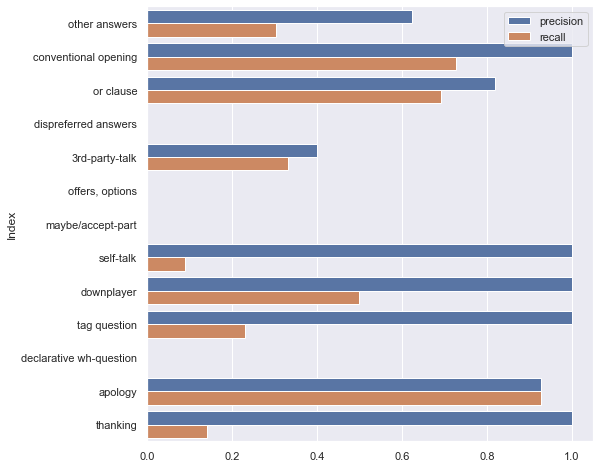

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme()

rev_dict = {v:k for k,v in E.D.act_id_dict.items()}
act_classes = [E.D.act_names_dict[rev_dict[i]] for i in range(len(rev_dict))]
data = {'index':act_classes, 'precision':precision, 'recall':recall}

df = pd.DataFrame(data)
df = df[df.recall.notna()]
tidy = df[-13:].melt(id_vars='index').rename(columns=str.title)

plt.figure(figsize=(8,8))

ax = sns.barplot(y="Index", 
            x="Value", 
            hue="Variable",
            orient='h',
            data=tidy)

ax.set(xlabel=None)
ax.legend_.set_title(None)